<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot



In [ ]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome

In [ ]:
# Import 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import svm


In [ ]:
# Split the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3, stratify=y)

linear  kernel train acc:  0.7833876221498371  test acc:  0.7337662337662337
     confusion matrix: [array([0.56493506, 0.08441558]), array([0.18181818, 0.16883117])]
linear  kernel train acc:  0.7801302931596091  test acc:  0.7337662337662337
     confusion matrix: [array([0.56493506, 0.08441558]), array([0.18181818, 0.16883117])]
linear  kernel train acc:  0.7801302931596091  test acc:  0.7337662337662337
     confusion matrix: [array([0.56493506, 0.08441558]), array([0.18181818, 0.16883117])]
linear  kernel train acc:  0.7801302931596091  test acc:  0.7337662337662337
     confusion matrix: [array([0.56493506, 0.08441558]), array([0.18181818, 0.16883117])]
linear  kernel train acc:  0.7785016286644951  test acc:  0.7272727272727273
     confusion matrix: [array([0.56493506, 0.08441558]), array([0.18831169, 0.16233766])]
linear  kernel train acc:  0.7768729641693811  test acc:  0.7272727272727273
     confusion matrix: [array([0.56493506, 0.08441558]), array([0.18831169, 0.16233766])

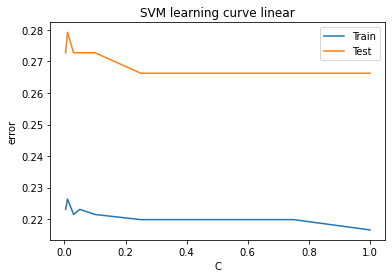

rbf  kernel train acc:  1.0  test acc:  0.6493506493506493
     confusion matrix: [array([0.64935065, 0.        ]), array([0.35064935, 0.        ])]
rbf  kernel train acc:  1.0  test acc:  0.6493506493506493
     confusion matrix: [array([0.64935065, 0.        ]), array([0.35064935, 0.        ])]
rbf  kernel train acc:  0.6514657980456026  test acc:  0.6493506493506493
     confusion matrix: [array([0.64935065, 0.        ]), array([0.35064935, 0.        ])]
rbf  kernel train acc:  0.6514657980456026  test acc:  0.6493506493506493
     confusion matrix: [array([0.64935065, 0.        ]), array([0.35064935, 0.        ])]
rbf  kernel train acc:  0.6514657980456026  test acc:  0.6493506493506493
     confusion matrix: [array([0.64935065, 0.        ]), array([0.35064935, 0.        ])]
rbf  kernel train acc:  0.6514657980456026  test acc:  0.6493506493506493
     confusion matrix: [array([0.64935065, 0.        ]), array([0.35064935, 0.        ])]
rbf  kernel train acc:  0.6514657980456026  te

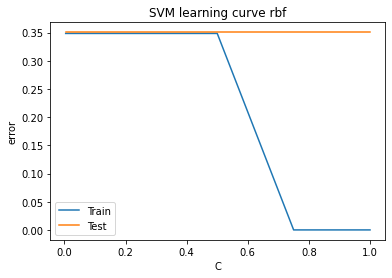

In [ ]:
#Loop through the different kernels
kernels = ['linear', 'rbf']
Cs = [1, 0.75, 0.5, 0.25, 0.1, 0.05, 0.03, 0.01, 0.004]

for mykernel in kernels:
   #optional soft margin parameter ; soft margin = 1 means no soft margin.
   train_acc=[]
   test_acc=[]
   train_err=[]
   test_err=[]
   for i in range(len(Cs)):
      #Create SVM classifer object
      model = svm.SVC(kernel=mykernel, C=Cs[i], gamma='auto')
      # Train SVM Classifer
      model = model.fit(x_train,y_train)

      #print results
      train_acc.append(metrics.accuracy_score(y_train,  model.predict(x_train)))
      test_acc.append(metrics.accuracy_score(y_test,  model.predict(x_test)))
      train_err.append(1-train_acc[i])
      test_err.append(1-test_acc[i])
      print(mykernel," kernel train acc: ", train_acc[i], " test acc: ", test_acc[i])
      cm=confusion_matrix(y_test, model.predict(x_test))
      print("     confusion matrix:", list(cm/cm.sum()))

   #plot results
   pyplot.plot(Cs, train_err, label='Train')
   pyplot.plot(Cs, test_err, label='Test')
   pyplot.title('SVM learning curve '+mykernel )
   pyplot.ylabel('error')
   pyplot.xlabel('C')
   pyplot.legend(loc='best')
   pyplot.show()
